# Configure environment


In [1]:
!nvidia-smi

Wed Nov 18 18:19:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 455.32.00    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P2000        On   | 00000000:01:00.0  On |                  N/A |
| N/A   45C    P0    N/A /  N/A |    358MiB /  4031MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!nvidia-settings -q CUDACores -t

768
768


In [3]:
!lscpu

Architektur:                     x86_64
CPU Operationsmodus:             32-bit, 64-bit
Byte-Reihenfolge:                Little Endian
Adressgrößen:                    39 bits physical, 48 bits virtual
CPU(s):                          12
Liste der Online-CPU(s):         0-11
Thread(s) pro Kern:              2
Kern(e) pro Socket:              6
Sockel:                          1
NUMA-Knoten:                     1
Anbieterkennung:                 GenuineIntel
Prozessorfamilie:                6
Modell:                          158
Modellname:                      Intel(R) Core(TM) i7-8850H CPU @ 2.60GHz
Stepping:                        10
CPU MHz:                         985.631
Maximale Taktfrequenz der CPU:   4300,0000
Minimale Taktfrequenz der CPU:   800,0000
BogoMIPS:                        5199.98
Virtualisierung:                 VT-x
L1d Cache:                       192 KiB
L1i Cache:                       192 KiB
L2 Cache:                        1,5 MiB
L3 Cache:                   

In [94]:
import os
import numpy as np
import pandas as pd

In [95]:
running_type = 'C'
threads = 6
experiments = 10

types = [
    {'name': 'S', 'max': 1, 'partitions': 1}, 
    {'name': 'O', 'max': 24, 'partitions': 16}, 
    {'name': 'C', 'max': 128 * 4, 'partitions': 20}
]

for t in types:
    for threads in np.linspace(1, t['max'], t['partitions']):
        for e in range(experiments):
            os.system("./bin/violajones {} {}".format(t['name'], int(threads)))

In [14]:
!cat output.csv

S, 17.602440,17.6024,1,-1,128,6
S, 17.710946,17.7109,1,-1,128,6
S, 17.524505,17.5245,1,-1,128,6
S, 17.263011,17.263,1,-1,128,6
S, 17.122285,17.1223,1,-1,128,6
S, 17.136415,17.1364,1,-1,128,6
S, 17.161889,17.1619,1,-1,128,6
S, 17.140422,17.1404,1,-1,128,6
S, 17.417868,17.4179,1,-1,128,6
S, 17.359138,17.3591,1,-1,128,6
O, 17.544190,17.5442,1,-1,128,6
O, 17.336983,17.337,1,-1,128,6
O, 17.700040,17.7,1,-1,128,6
O, 17.335350,17.3354,1,-1,128,6
O, 17.95061,17.0951,1,-1,128,6
O, 17.81321,17.0813,1,-1,128,6
O, 16.979482,16.9795,1,-1,128,6
O, 17.152011,17.152,1,-1,128,6
O, 18.535135,18.5351,1,-1,128,6
O, 17.494511,17.4945,1,-1,128,6
O, 11.275130,11.2751,2,-1,128,6
O, 11.919218,11.9192,2,-1,128,6
O, 12.564127,12.5641,2,-1,128,6
O, 12.132645,12.1326,2,-1,128,6
O, 12.304666,12.3047,2,-1,128,6
O, 11.748634,11.7486,2,-1,128,6
O, 11.601236,11.6012,2,-1,128,6
O, 11.286990,11.287,2,-1,128,6
O, 11.250300,11.2503,2,-1,128,6
O, 11.510858,11.5109,2,-1,128,6
O, 8.60505,8.06051,4,-1,128,6
O, 7.938732,7.93874

In [32]:
import pandas as pd
df = pd.read_csv("output_old.csv", names=('Type', "Time 1", "Time 2", "Threads", "Blocks", "Cores", "MPs"))
df

,Type,Time 1,Time 2,Threads,Blocks,Cores,MPs
0,S,18.591916,18.59190,1,-1,128,6
1,O,19.160380,19.01600,1,-1,128,6
2,O,12.180911,12.18090,2,-1,128,6
3,O,9.420914,9.42092,4,-1,128,6
4,O,8.700521,8.70053,5,-1,128,6
5,O,10.735772,10.73580,7,-1,128,6
6,O,9.423043,9.42305,8,-1,128,6
7,O,8.702704,8.70271,10,-1,128,6
8,O,8.601330,8.06014,11,-1,128,6
9,O,7.300676,7.30068,13,-1,128,6


In [33]:
df["Time"] = df[["Time 1", "Time 2"]].mean(axis = 1)

In [34]:
sequential = (df.iloc[0][1] + df.iloc[0][2]) / 2
df.insert(0, "Speedup", df['Time'].apply(lambda x: float(sequential / float(x)), 0), True)
df["Speedup"] = df["Speedup"].apply(pd.to_numeric)

In [35]:
df

,Speedup,Type,Time 1,Time 2,Threads,Blocks,Cores,MPs,Time
0,1.000000,S,18.591916,18.59190,1,-1,128,6,18.591908
1,0.974001,O,19.160380,19.01600,1,-1,128,6,19.088190
2,1.526316,O,12.180911,12.18090,2,-1,128,6,12.180905
3,1.973471,O,9.420914,9.42092,4,-1,128,6,9.420917
4,2.136872,O,8.700521,8.70053,5,-1,128,6,8.700526
5,1.731770,O,10.735772,10.73580,7,-1,128,6,10.735786
6,1.973025,O,9.423043,9.42305,8,-1,128,6,9.423046
7,2.136336,O,8.702704,8.70271,10,-1,128,6,8.702707
8,2.231725,O,8.601330,8.06014,11,-1,128,6,8.330735
9,2.546600,O,7.300676,7.30068,13,-1,128,6,7.300678


In [36]:
df[df.Type == "C"].groupby(["Threads", "Blocks"]).mean().min()

Speedup      0.143676
Time 1     120.947230
Time 2     120.095000
Cores      128.000000
MPs          6.000000
Time       120.521115
dtype: float64

<AxesSubplot:xlabel='Threads'>

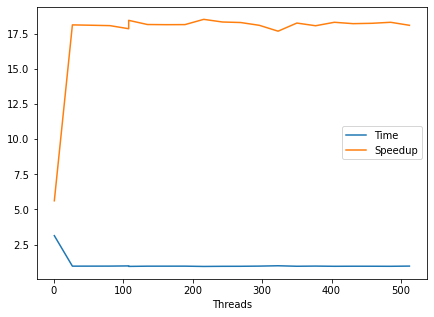

In [12]:
running_type = "C"
df[df.Type == running_type].groupby(["Threads", "Blocks"]).mean().reset_index()[["Threads", "Time", "Speedup"]].plot(x="Threads", y=["Time", "Speedup"], figsize=(7, 5))

In [ ]:
!ls /usr/local/cuda/bin/nvprof*

/usr/local/cuda/bin/bin2c
/usr/local/cuda/bin/computeprof
/usr/local/cuda/bin/cudafe
/usr/local/cuda/bin/cudafe++
/usr/local/cuda/bin/cuda-gdb
/usr/local/cuda/bin/cuda-gdbserver
/usr/local/cuda/bin/cuda-install-samples-8.0.sh
/usr/local/cuda/bin/cuda-memcheck
/usr/local/cuda/bin/cuobjdump
/usr/local/cuda/bin/fatbinary
/usr/local/cuda/bin/g++
/usr/local/cuda/bin/gcc
/usr/local/cuda/bin/gpu-library-advisor
/usr/local/cuda/bin/nsight
/usr/local/cuda/bin/nvcc
/usr/local/cuda/bin/nvcc.profile
/usr/local/cuda/bin/nvdisasm
/usr/local/cuda/bin/nvlink
/usr/local/cuda/bin/nvprof
/usr/local/cuda/bin/nvprune
/usr/local/cuda/bin/nvvp
/usr/local/cuda/bin/ptxas

/usr/local/cuda/bin/crt:
link.stub  prelink.stub


In [ ]:
!./bin/pi

In [ ]:
!tail output2.csv

82,431,0.243425
82,458,0.244504
82,485,0.251062
82,512,0.23940840,120,0.425272
40,120,0.320597
40,120,0.359431
40,120,0.357095
40,120,0.358252
40,120,0.343038
40,120,0.389715


In [ ]:
!nvprof -V

nvprof: NVIDIA (R) Cuda command line profiler
Copyright (c) 2012 - 2016 NVIDIA Corporation
Release version 8.0.61 (21)


In [ ]:
%%shell

/usr/local/cuda-10.0/bin/./nvprof ./bin/pi

==4433== NVPROF is profiling process 4433, command: ./bin/pi
==4433== Profiling application: ./bin/pi
==4433== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  240.74ms         1  240.74ms  240.74ms  240.74ms  calcPi(float*, long, long)
                    0.00%  6.3040us         1  6.3040us  6.3040us  6.3040us  red(float*)
                    0.00%  2.2080us         1  2.2080us  2.2080us  2.2080us  [CUDA memset]
                    0.00%  1.6000us         1  1.6000us  1.6000us  1.6000us  [CUDA memcpy DtoH]
      API calls:   54.81%  240.77ms         1  240.77ms  240.77ms  240.77ms  cudaMemcpy
                   44.96%  197.53ms         1  197.53ms  197.53ms  197.53ms  cudaMalloc
                    0.09%  412.48us         1  412.48us  412.48us  412.48us  cuDeviceTotalMem
                    0.05%  198.37us         1  198.37us  198.37us  198.37us  cudaFree
                    0.03%  148.90us        90  1.6540